In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "heart-attack"                            
[2] "heart-attack-analysis-prediction-dataset"

## **What is Cardiac Arrest**?##
It is an immediate abrupt loss of heart function, breathing and alertness of body. This situatioin usually usually an outcome of failure of heart's electrical system, which disbalance your heart's pumping action and interrupt smooth blood flow to your body. Which further requires immediate medical supervision.

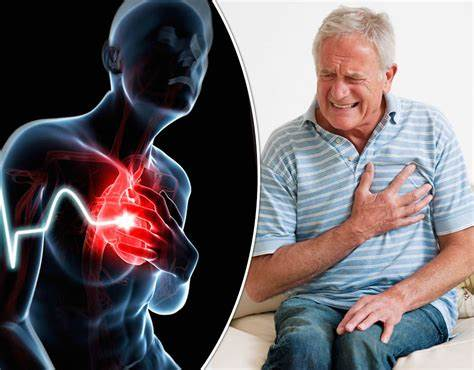

In [2]:
library(tidyverse)


# ** Terms Meaning**
age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

In [3]:
##Importing Data
data<- read.csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
data

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [4]:
## Checking data head
head(data)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [5]:
#Checking data tail
tail(data)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Getting Rough idea about the Rows $ Column
glimpse(data)

Rows: 303
Columns: 14
$ age      <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5…
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1…
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0…
$ trtbps   <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1…
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2…
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1…
$ thalachh <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1…
$ exng     <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0…
$ slp      <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1…
$ caa      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0…
$ thall    <int> 1

In [7]:
# Number of column
ncol(data)

[1] 14

In [8]:
#Number of Rows
nrow(data)

[1] 303

In [9]:
# To finding the names of column in the data
colnames(data)

[1] "age"      "sex"      "cp"       "trtbps"   "chol"     "fbs"     
 [7] "restecg"  "thalachh" "exng"     "oldpeak"  "slp"      "caa"     
[13] "thall"    "output"

In [10]:
# Statastical information about the data
summary(data)

      age             sex               cp            trtbps     
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalachh    
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
      exng           oldpeak          slp             caa        
 Mi

# **Summary description**
*This data covering the age from 29 to 77 age group of people.


*Cholestrol findings are from 126 to 564.



 

# Data conversion; will be helpful in data visualization****

In [11]:
data2<- data %>%
   mutate(sex = if_else(sex ==1,"MALE","FEMALE"),
         fbs = if_else(fbs ==1,">120","<=120"),
         exng = if_else(exng ==1,"YES","NO"),
         cp = if_else(cp==1,"ATYPICAL ANGINA",
                     if_else(cp==2,"NON-ANGINAL PAIN","ASYMPTOTIC")),
         restecg = if_else(restecg==0,"Normal",
                         if_else(restecg==1,"ABNORMALITY","PROBABLE OF DEFINITE")),
         slp = as.factor(slp),
         caa = as.factor(caa),
         thall = as.factor(thall),
         output = if_else(output==1,"YES","NO")
         ) %>%
mutate_if(is.character,as.factor)%>%
dplyr::select(output,sex,fbs,exng,cp,restecg,slp,caa,thall, everything())


# Data visualization****

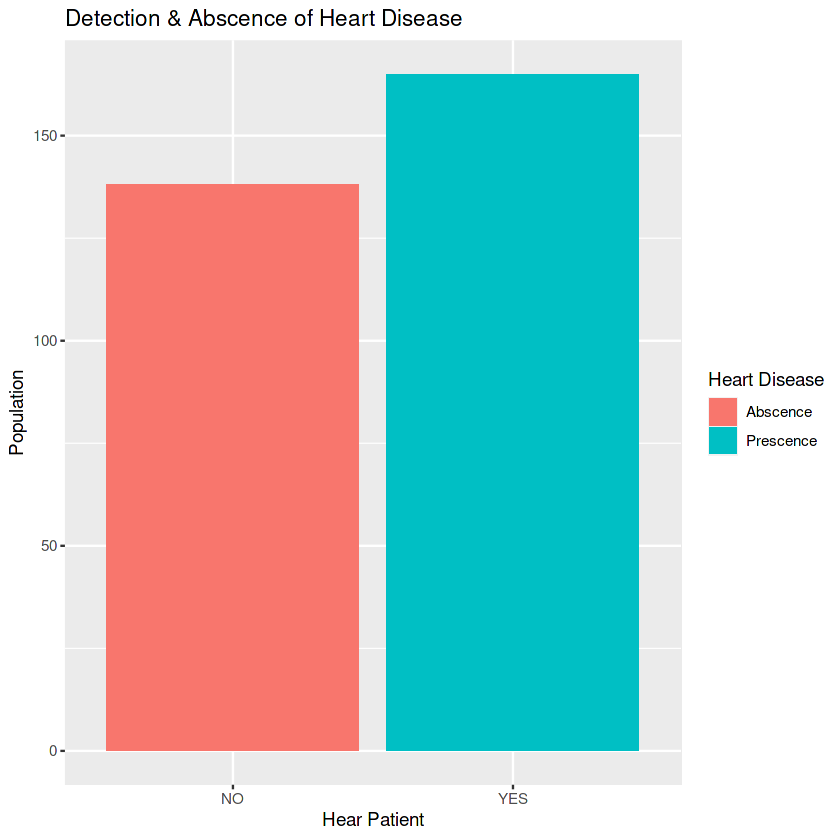

In [12]:
#Bar plot for the comparison of how many persons are having Heart diesease or not
ggplot(data2, aes(x=output,fill=output))+
   geom_bar()+
   xlab("Hear Patient")+
   ylab("Population")+
   ggtitle("Detection & Abscence of Heart Disease")+
   scale_fill_discrete(name="Heart Disease", labels=c("Abscence","Prescence"))

**More persons among the population are having heart disease problems, few of them are not having heart disease**

In [13]:
#Finding the proportion of the people to quantify how many of them are having heart disease and how many are not
prop.table(table(data2$output))


       NO       YES 
0.4554455 0.5445545 

# **Above data quantify that 54.45% population are dignosed with the heart disease where as 45.54% of the population are not having any type of heart disease**

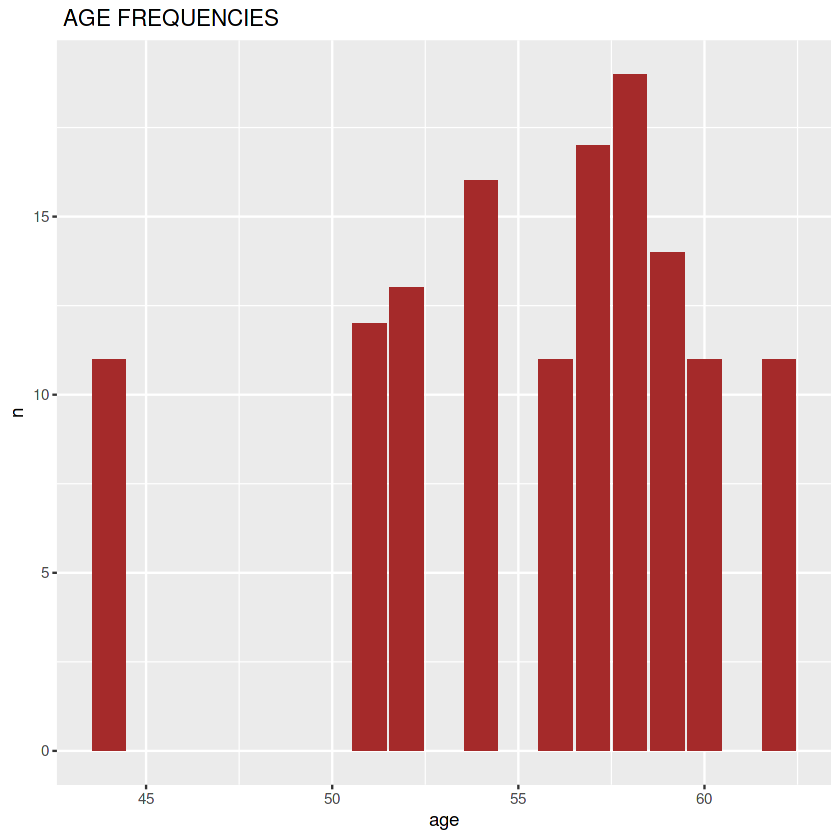

In [14]:
#Checking which age group is having how much contribution in the dataset
data2 %>%
  group_by(age)%>%
  count()%>%
  filter(n>10)%>%
  ggplot()+
  geom_col(aes(age,n), fill= 'brown')+
  ggtitle(" AGE FREQUENCIES")
 


# There is a wide gap in between age from 45 to 50,may be people in this age group could be busy type dont get the time to get routine checkup or may be due to their work load they burn more calorie so dnt fell to get medical chekups, where as in age betwee 56 to 60 age group participants are migh may be due to old age they need regular health chekups****

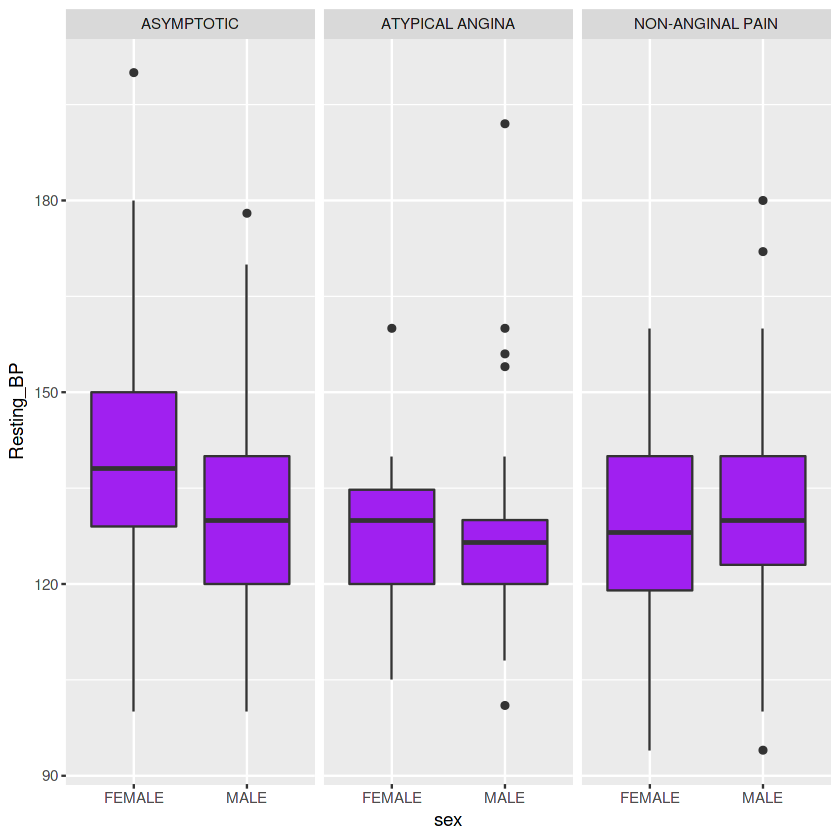

In [15]:
# Comparing the "Blood pressure" and "Different kind of chest pain" among the Male and Female
data2%>%
 ggplot(aes(x=sex, y=trtbps))+
 geom_boxplot(fill="purple")+
 xlab('sex')+
 ylab("Resting_BP")+
 facet_grid(~cp )

**The above box plot is showing three types of pain and corresponding blood pressure among males and female**
**Normal Blooed Pressure Rnage is 120, and above 140 it is considered as higher B.P, If it crosses 180 can cause severe damage**
* For Asymptotic chest pain, Females are having higher blodd pressue above 180, which is far above than normal,whereas males are also having higher B.P, but there maximum is below 180.
* For Atypical type f chest pain, male and female both are having average BP less than even 150, but some og the males are having higher BP above 150 and also  above 180 which are catastrophic, means this type of chest pain can be dangerous.
* For Non-Anginal pain, both males and females are haing average BP below 150, none of the females are having higher BP some males are having near by 180, some males have seen with low BP below 100 with this type of Pain.

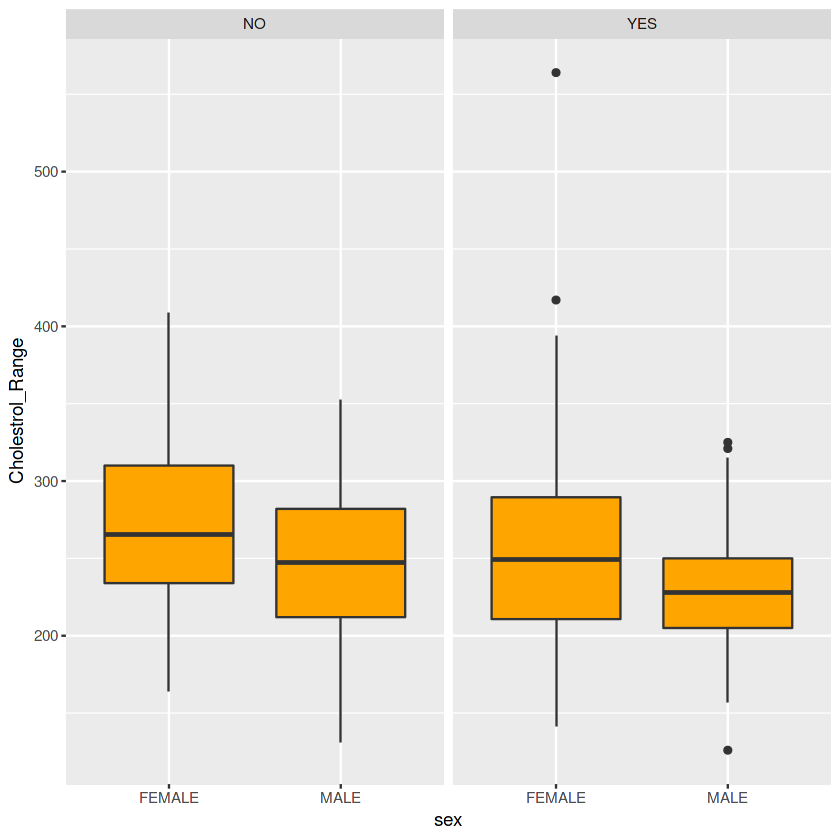

In [16]:
# Assessing the relationship between cholestrol and heart diseae
data2%>%
 ggplot(aes(x=sex, y=chol))+
 geom_boxplot(fill="orange")+
 xlab('sex')+
 ylab("Cholestrol_Range")+
 facet_grid(~output)

 

# As the above Box plot is depicted the relationship between cholestrol range and heart disease prescence****
**Less than 200 is good, above 240 isd High and can be dangerous, Yes means prescence of heart disease and No meand abscence of heart disease**
* With no heart disease
Those who have not dognosed with the heart disease are havingcholestrol level averege below 250, males are having less cholestrols, may be due to more physical movement or less comnsumption of oily foods. Also, non of them are haivng shooting cholestrol levels.
* With Prescence of Heart Disease
Those who are having herat disease, average of the male and females are having cholestrol level in the range obelow 250, but yes some of the males and females both are having very high cholestrol values, in males it goes above 300 which is not a good sign, and in females it surprisingly crosses 400, and some were caught cholestrol level upto above 500, they are dognosed with the heart disesase
* So, this indicates to get rid of heart disease its always better to control the cholestrl level below 250.

In [17]:
#Installing packages to esablishing correlation
library(corrplot)
library(ggthemes)
library(ggplot2)

corrplot 0.88 loaded



# Devloping correlation between different columns like age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thalloutput to find which s strongly related with wich variable and which is not have any link with any varriable***

,age,trtbps,chol,thalachh,oldpeak
age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trtbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalachh,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


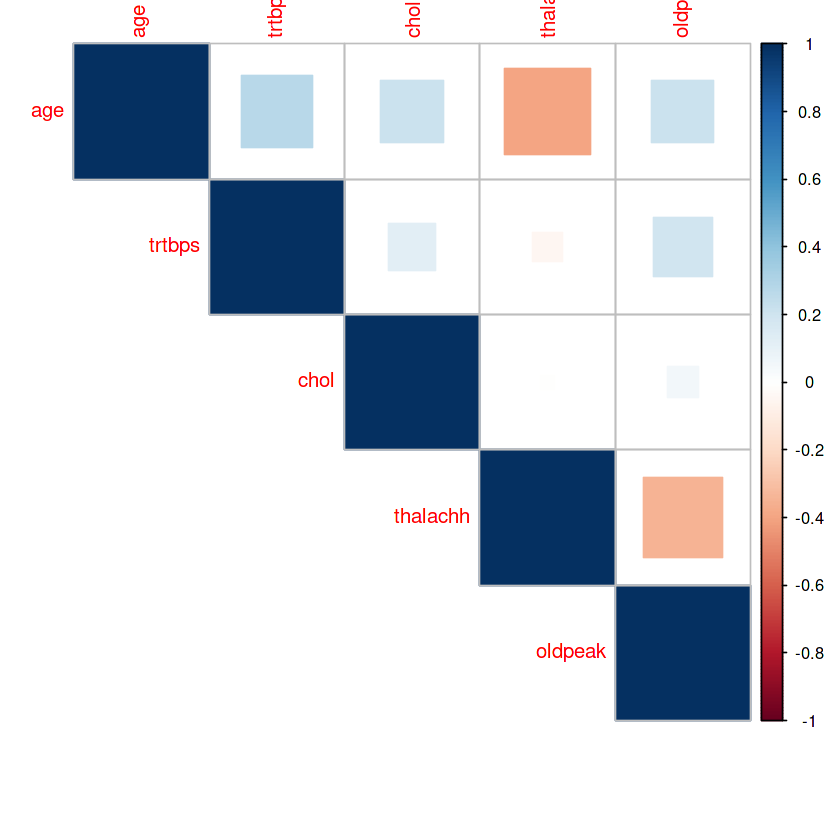

In [18]:
cor_heart <- cor(data2[,10:14])
cor_heart
corrplot(cor_heart, method="square", type="upper",)


# **The above correlation plot is telling how strongly an varriable is related with other varriables**
* The magnitude 1 indicating strongly corelation and negative values indicating no corelations
* Like wise the darker the colour will be stronger will be the relationa whereas fader the colour will be loosely the relation will be
1. Age is strongly related with the blood pressure, cholestrol, whereas it is not having any relation with Maximum heart rate achieved.
2. Similarily,  resting BP, is also related with the cholestrol level and oldpeak
3. Maximum heart rate is not having any link with old peak